**Problem Statement: “Given the height (in feet), weight (in lbs) and foot size (in inches), predict whether the person is a male or female”**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
df=pd.read_csv('person.csv')
df

,Person,height(in feet),weight(in lbs),foot size(in inches)
0,male,6.00,180,12
1,male,5.92,190,11
2,male,5.58,170,12
3,male,5.92,165,10
4,female,5.00,100,6
5,female,5.50,150,8
6,female,5.42,130,7
7,female,5.75,150,9


In [3]:
df.shape

(8, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
Person                  8 non-null object
height(in feet)         8 non-null float64
weight(in lbs)          8 non-null int64
foot size(in inches)    8 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 384.0+ bytes


In [5]:
df.isnull().sum()

Person                  0
height(in feet)         0
weight(in lbs)          0
foot size(in inches)    0
dtype: int64

In [18]:
df.corr()

,height(in feet),weight(in lbs),foot size(in inches)
height(in feet),1.000000,0.909442,0.803875
weight(in lbs),0.909442,1.000000,0.919178
foot size(in inches),0.803875,0.919178,1.000000


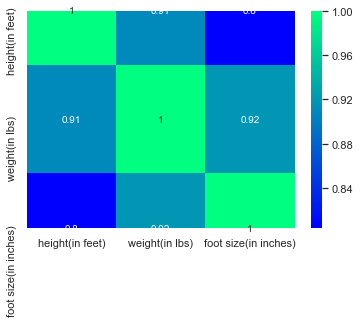

In [34]:
sns.heatmap(df.corr(),annot=True,cmap='winter')

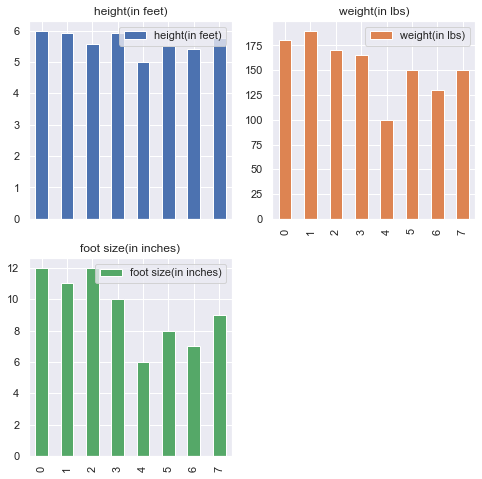

In [31]:
df.plot.bar(subplots=True,layout=(2,2),figsize=(8,8))
plt.show()

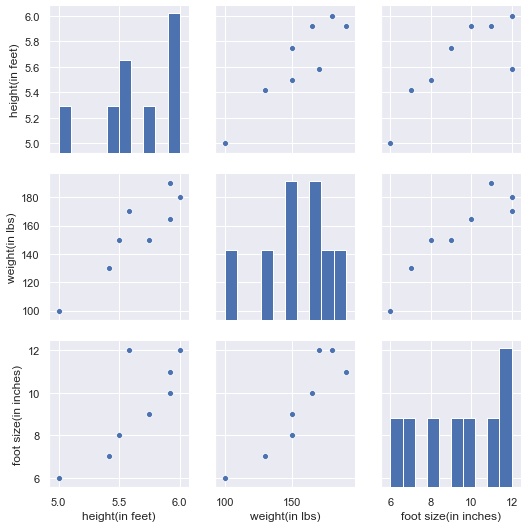

In [35]:
sns.pairplot(df)

In [3]:
X=df.iloc[:,1:].values
X

array([[  6.  , 180.  ,  12.  ],
       [  5.92, 190.  ,  11.  ],
       [  5.58, 170.  ,  12.  ],
       [  5.92, 165.  ,  10.  ],
       [  5.  , 100.  ,   6.  ],
       [  5.5 , 150.  ,   8.  ],
       [  5.42, 130.  ,   7.  ],
       [  5.75, 150.  ,   9.  ]])

In [4]:
y=df.iloc[:,0].values
y

array(['male', 'male', 'male', 'male', 'female', 'female', 'female',
       'female'], dtype=object)

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=0)

In [6]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [7]:
X_train

array([[ 0.32194412,  0.03716471,  0.        ],
       [ 0.79375878,  0.59463532,  0.5       ],
       [ 1.0157892 ,  1.15210593,  1.5       ],
       [-0.37190097,  0.03716471, -0.5       ],
       [-1.75959113, -1.82107066, -1.5       ]])

# Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
y_pred=classifier.predict(X_test)
y_pred

array(['female', 'male', 'male'], dtype=object)

In [10]:
y_test

array(['female', 'male', 'male'], dtype=object)

In [11]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1, 0],
       [0, 2]], dtype=int64)

In [12]:
from sklearn import metrics
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Accuracy: 1.0


**Prediction**

In [13]:
y_pred=classifier.predict(sc.transform(np.array([[5.5,145,7]])))
y_pred

array(['female'], dtype=object)

# Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [15]:
y_Pred=clf.predict(X_test)
y_Pred

array(['female', 'female', 'male'], dtype=object)

In [16]:
from sklearn.metrics import confusion_matrix
cmm=confusion_matrix(y_test,y_Pred)
cmm

array([[1, 0],
       [1, 1]], dtype=int64)

In [17]:
from sklearn import metrics
print('Accuracy:',metrics.accuracy_score(y_test,y_Pred))

Accuracy: 0.6666666666666666


# Decision Tree Classifier

In [18]:
from sklearn.tree import DecisionTreeClassifier
cld=DecisionTreeClassifier(criterion='entropy',random_state=0)
cld.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [19]:
ypred=cld.predict(X_test)
ypred

array(['female', 'male', 'male'], dtype=object)

In [20]:
from sklearn.metrics import confusion_matrix
cmdt=confusion_matrix(y_test,ypred)
cmdt

array([[1, 0],
       [0, 2]], dtype=int64)

In [21]:
from sklearn import metrics
print('Accuracy:',metrics.accuracy_score(y_test,ypred))

Accuracy: 1.0


# Support Vector Classifier

In [22]:
from sklearn.svm import SVC
sv_cla=SVC(kernel='linear',random_state=0)
sv_cla.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [23]:
ypredict=sv_cla.predict(X_test)
ypredict

array(['female', 'male', 'male'], dtype=object)

In [24]:
from sklearn.metrics import confusion_matrix
cmsv=confusion_matrix(y_test,ypredict)
cmsv

array([[1, 0],
       [0, 2]], dtype=int64)

In [25]:
from sklearn import metrics
print('Accuracy:',metrics.accuracy_score(y_test,ypredict))

Accuracy: 1.0


# SVM Kernel

In [26]:
from sklearn.svm import SVC
cla=SVC(kernel='rbf',random_state=0)
cla.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [27]:
y_predict=cla.predict(X_test)
y_predict

array(['female', 'male', 'male'], dtype=object)

In [28]:
from sklearn.metrics import confusion_matrix
cmsvk=confusion_matrix(y_test,y_predict)
cmsvk

array([[1, 0],
       [0, 2]], dtype=int64)

In [29]:
from sklearn import metrics
print('Accuracy:',metrics.accuracy_score(y_test,y_predict))

Accuracy: 1.0


In [30]:
from sklearn import svm
for k in ['linear','poly','rbf','sigmoid']:
    clf=svm.SVC(kernel=k)   #clf=SVC(kernel=k)
    clf.fit(X_train,y_train)
    confidence=clf.score(X_test,y_test)
    print(k,confidence)

linear 1.0
poly 0.6666666666666666
rbf 1.0
sigmoid 1.0


# KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier
classif=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classif.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [32]:
y_pred1=classif.predict(X_test)
y_pred1

array(['female', 'female', 'female'], dtype=object)

In [33]:
from sklearn.metrics import confusion_matrix
cmskn=confusion_matrix(y_test,y_pred1)
cmskn

array([[1, 0],
       [2, 0]], dtype=int64)

In [34]:
from sklearn import metrics
print('Accuracy:',metrics.accuracy_score(y_test,y_pred1))

Accuracy: 0.3333333333333333


# Naive Bayes

In [35]:
#Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classif1=GaussianNB()
classif1.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [36]:
y_pred2=classif1.predict(X_test)
y_pred2

array(['female', 'female', 'male'], dtype='<U6')

In [37]:
from sklearn.metrics import confusion_matrix
cmnb=confusion_matrix(y_test,y_pred1)
cmnb

array([[1, 0],
       [2, 0]], dtype=int64)

In [38]:
from sklearn import metrics
print('Accuracy:',metrics.accuracy_score(y_test,y_pred2))

Accuracy: 0.6666666666666666


In [47]:
classification_Type=['Logistic Regression','Random Forest ','Decision Tree','Kernel-SVM','SVM','KNN','Naive Bayes']
score=['100%','66%','100%','100%','100%','33%','66%']

In [48]:
df_new=pd.DataFrame({'Classification_Types':classification_Type,'Score':score})
df_new

,Classification_Types,Score
0,Logistic Regression,100%
1,Random Forest,66%
2,Decision Tree,100%
3,Kernel-SVM,100%
4,SVM,100%
5,KNN,33%
6,Naive Bayes,66%
